In [ ]:
import pandas as pd
df = pd.read_csv('/Users/kai/Desktop/qs/data_csv_distinct_0606/000001.SZ.csv')[['TRADE_DT', 'S_DQ_CLOSE']]
df['TRADE_DT'] = pd.to_datetime(df['TRADE_DT'], format='%Y%m%d')

In [ ]:
df['shift_date'] = df['TRADE_DT'].shift()
display(df)
df.dropna(subset=['shift_date'], inplace=True)
df

In [ ]:
import time 
start1 = time.time()
for i in range(10000):
    df_cross = pd.DataFrame()
    df_cross=df[(df['golden_cross']==1)|(df['death_cross']==1)]
end1 = time.time()
print(end1-start1)
start2 = time.time()
for i in range(10000):
    df_cross = pd.DataFrame()
    df_cross=df[(df['golden_cross']==1)|(df['death_cross']==1)].copy()
end2 = time.time()
print(end2-start2)

In [ ]:
import high_low_xuejie_zuhui as hl
import pandas as pd
filename = '000001.SZ.csv'
df = hl.df_init(filename)
a = hl.find_high_low(df, filename=filename, save_data = False, draw_n_days=200, draw=True)

In [ ]:
df1 = df.head(5)
df2 = df1[df1['TRADE_DT'] > '2000-01-05']
print(df2.iloc[1,-1])
df2.iat[1,-1] = 9
print(df2.iloc[1,-1])
display(df1)
display(df2)

In [ ]:
import sys
import talib
for i in sys.path:
    print(i)

In [ ]:
def find_high_low_xuemei(df):
    '''
    Output:
    ------------
    (high_points, low_points)\n
    high_points = [{'high_date': '2019-01-01', 'high_price': 10.0}, ...]\n
    low_points = [{'low_date': '2019-01-01', 'low_price': 10.0}, ...]

    Example:
    ------------
    >>> df = pd.read_csv('000001.SZ.csv')
    >>> df['TRADE_DT'] = pd.to_datetime(df['TRADE_DT'], format='%Y%m%d')
    >>> df = df[['TRADE_DT', 'S_DQ_CLOSE']]
    >>> high_points, low_points = find_high_low(df)
    '''
    # 找出MACD
    macd, macd_signal, _ = talib.MACD(df['S_DQ_CLOSE'].values)
    df['macd'] = macd
    df['macd_signal'] = macd_signal

    # 找出金叉和死叉
    df['golden_cross'] = ((df['macd'] > df['macd_signal']) & (
        df['macd'].shift() < df['macd_signal'].shift())).astype(int)
    df['death_cross'] = ((df['macd'] < df['macd_signal']) & (
        df['macd'].shift() > df['macd_signal'].shift())).astype(int)

    # 选出金叉和死叉
    # * df_cross保存了金叉、死叉，shift_date是下一个x的日期
    df_cross = df[(df['golden_cross'] == 1) | (df['death_cross'] == 1)].copy()
    df_cross['shift_date'] = df_cross['TRADE_DT'].shift(-1)
    df_cross = df_cross.dropna(subset=['shift_date'])
    df_high_points = pd.DataFrame()
    df_low_points = pd.DataFrame()
    for index, row in df_cross.iterrows():
        # df3保存了两个x之间的df
        df_current_window = df[(df['TRADE_DT'] >= row['TRADE_DT']) & (
            df['TRADE_DT'] <= row['shift_date'])]
        if df_current_window.iloc[0]['golden_cross'] == 1:
            # * 金叉->死叉，之间是高点
            df_temp = df_current_window[df_current_window['S_DQ_CLOSE'].values ==
                                        df_current_window['S_DQ_CLOSE'].max()]
            df_temp = df_temp.head(1)
            df_high_points = pd.concat([df_high_points, df_temp])
        elif df_current_window.iloc[0]['death_cross'] == 1:
            # * 死叉->金叉，之间是低点
            df_temp = df_current_window[df_current_window['S_DQ_CLOSE'].values ==
                                        df_current_window['S_DQ_CLOSE'].min()]
            df_temp = df_temp.head(1)
            df_low_points = pd.concat([df_low_points, df_temp])

    # 初始化一个列表：high_points，其中每个元素是一个字典，包含两个键值对：high_date和high_price
    high_points = []
    for index, row in df_high_points.iterrows():
        high_points.append(
            {'high_date': row['TRADE_DT'], 'high_price': row['S_DQ_CLOSE']})
    # 初始化一个列表：low_points，其中每个元素是一个字典，包含两个键值对：low_date和low_price
    low_points = []
    for index, row in df_low_points.iterrows():
        low_points.append(
            {'low_date': row['TRADE_DT'], 'low_price': row['S_DQ_CLOSE']})

    return (high_points, low_points)


In [1]:
import horizontal_area as ha
import high_low_xuejie_zuhui as hl
filename = '000002.SZ.csv'
draw_n_days = 400
df = hl.df_init(filename)

Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000002.SZ.csv


Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000002.SZ.csv


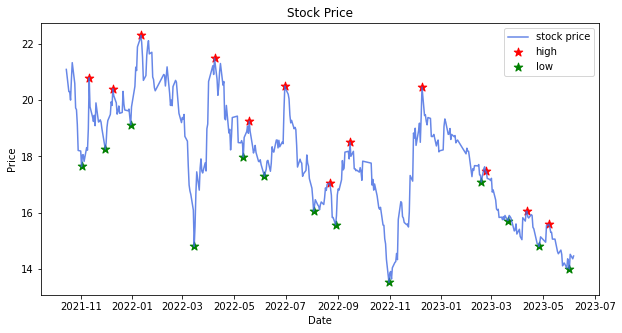

In [7]:
filename = '000002.SZ.csv'
draw_n_days = 400
df = hl.df_init(filename)
high_points, low_points = hl.find_high_low(df, filename, save_data = False, draw_n_days=draw_n_days, draw=True)

Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000002.SZ.csv


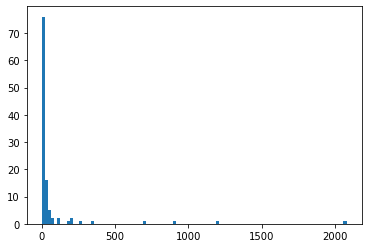

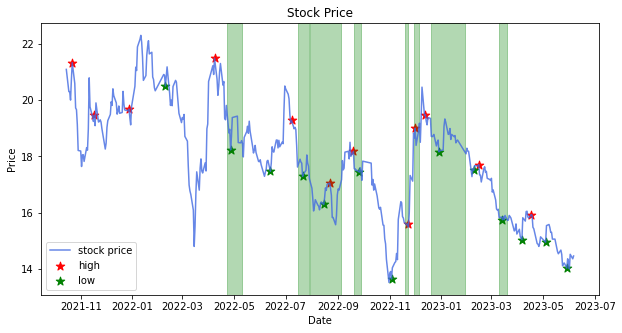

(111, 7912.0)

In [2]:
filename = '000002.SZ.csv'
df = hl.df_init(filename)
_, _, high_points, low_points = hl.find_high_low_old(df, filename=filename, save_data = False, draw_n_days=200, draw=False)
result = ha.find_ha_near_hl(df, high_points, low_points)
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=400, print_result=False, show_plot=True, save_plot=False)

Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000002.SZ.csv


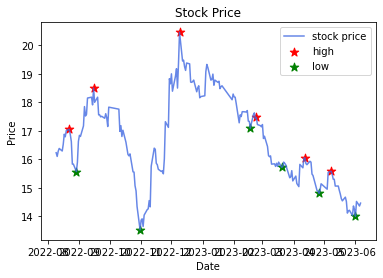

当前参数组合: max_len_of_window = 40, min_len_of_window = 5, gamma = 0.4


100%|██████████| 5676/5676 [00:28<00:00, 201.08it/s]


In [2]:
filename = '000002.SZ.csv'
df = hl.df_init(filename)
high_points, low_points = hl.find_high_low(df, filename=filename, save_data = False, draw_n_days=200, draw=True)
result = ha.find_horizontal_area(df, high_points, low_points, 40, 5, ignore_hl=False)

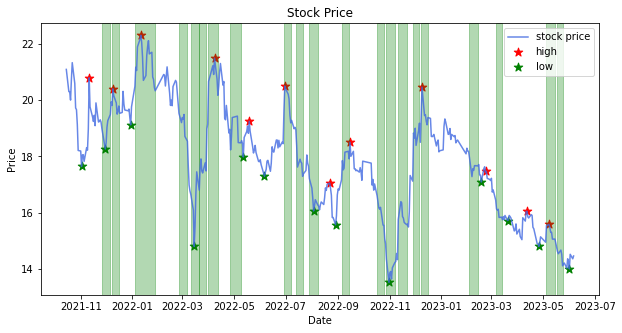

(284, 3213)

In [4]:
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=400, print_result=False, show_plot=True, save_plot=False)

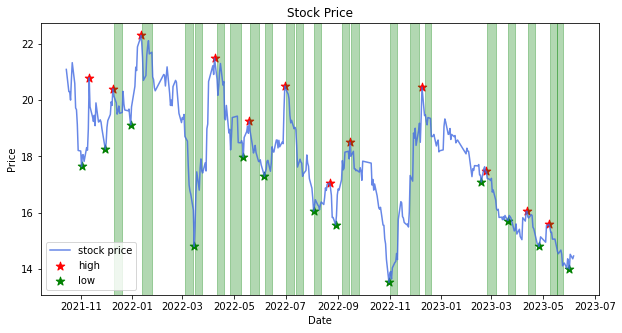

(341, 3160)

In [9]:
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=400, print_result=False, show_plot=True, save_plot=False)

Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000002.SZ.csv


/Users/kai/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


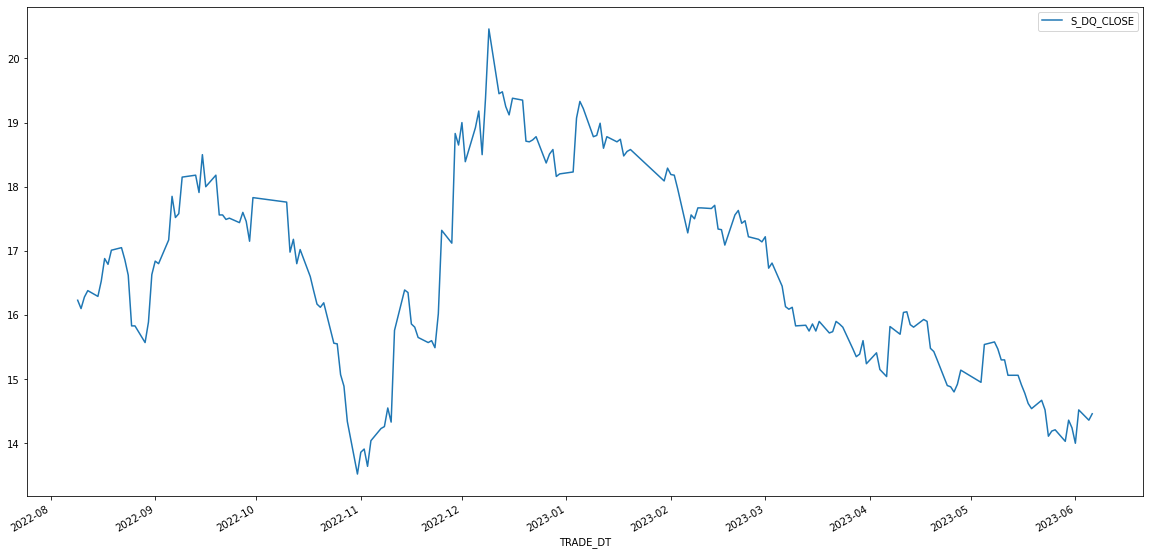

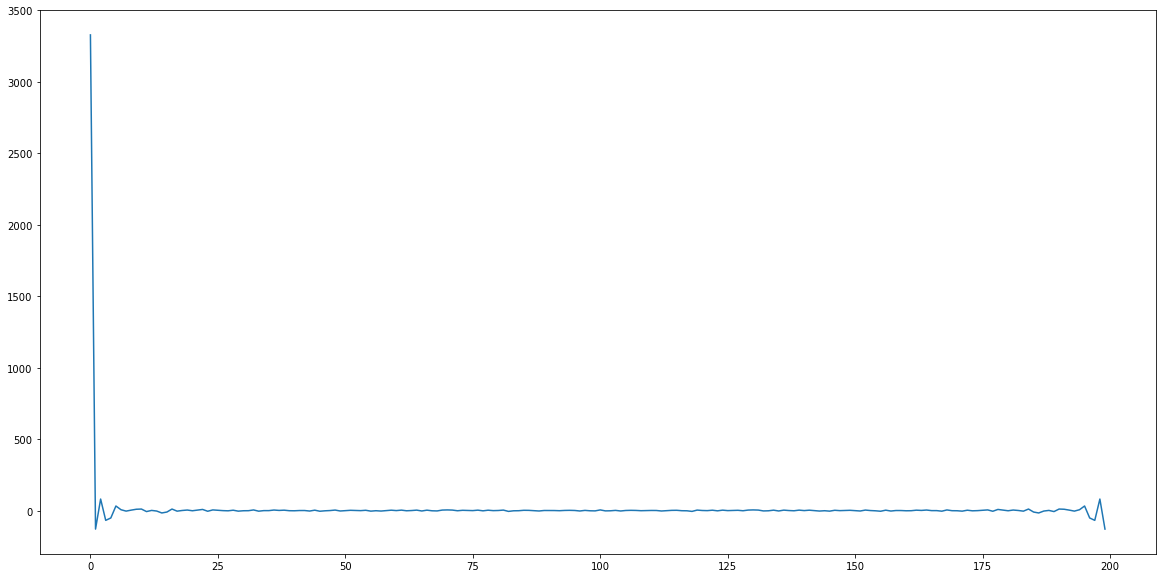

/Users/kai/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.004578321570314942


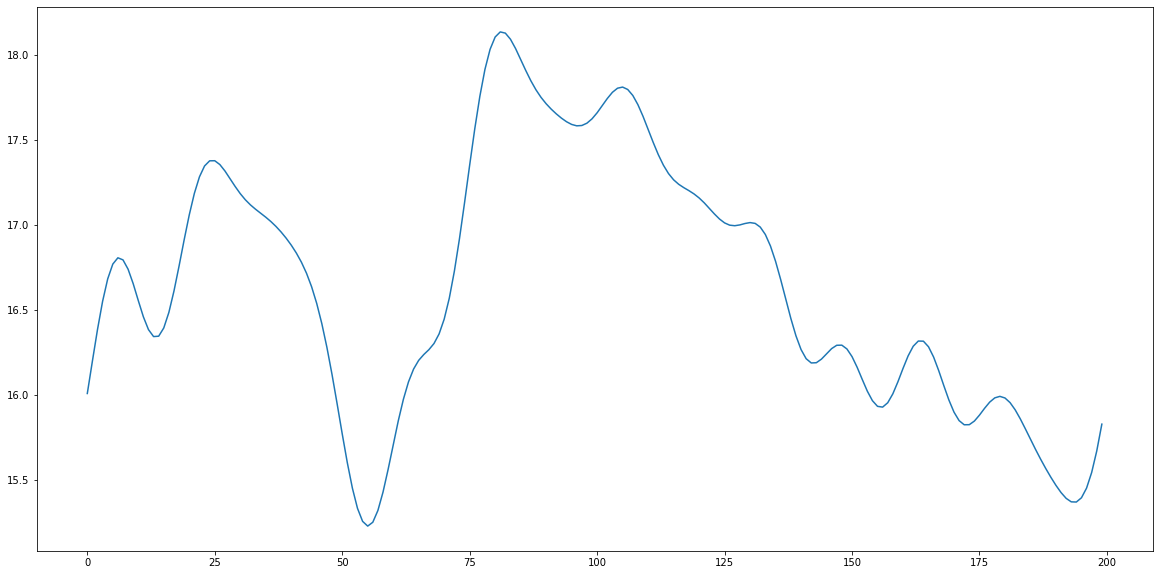

In [7]:
# 对上方得到的data曲线进行DFT变换，得到频域上的信号
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd
import high_low_xuejie_zuhui as hl
filename = '000002.SZ.csv'
df = hl.df_init(filename)
data = df.tail(200)
data.plot(x='TRADE_DT', y='S_DQ_CLOSE', figsize=(20, 10))
# 对data进行DFT变换
data_fft = fft(data['S_DQ_CLOSE'].values)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(data_fft)
plt.show()
# 计算频谱中的总能量，并计算高频成分所占的比例。如果高频成分所占比例较小，那么曲线就比较平滑。
# 计算频谱中的总能量
energy = (data_fft * np.conj(data_fft)).real
# 计算高频成分所占的比例
high_freq_ratio = np.sum(energy[10:]) / np.sum(energy)
print(high_freq_ratio)
# 对高频成分进行滤波
data_fft_filtered = data_fft.copy()
data_fft_filtered[15:] = 0
# 对滤波后的数据进行逆变换
data_filtered = ifft(data_fft_filtered)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(data_filtered)
plt.show()

Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000002.SZ.csv


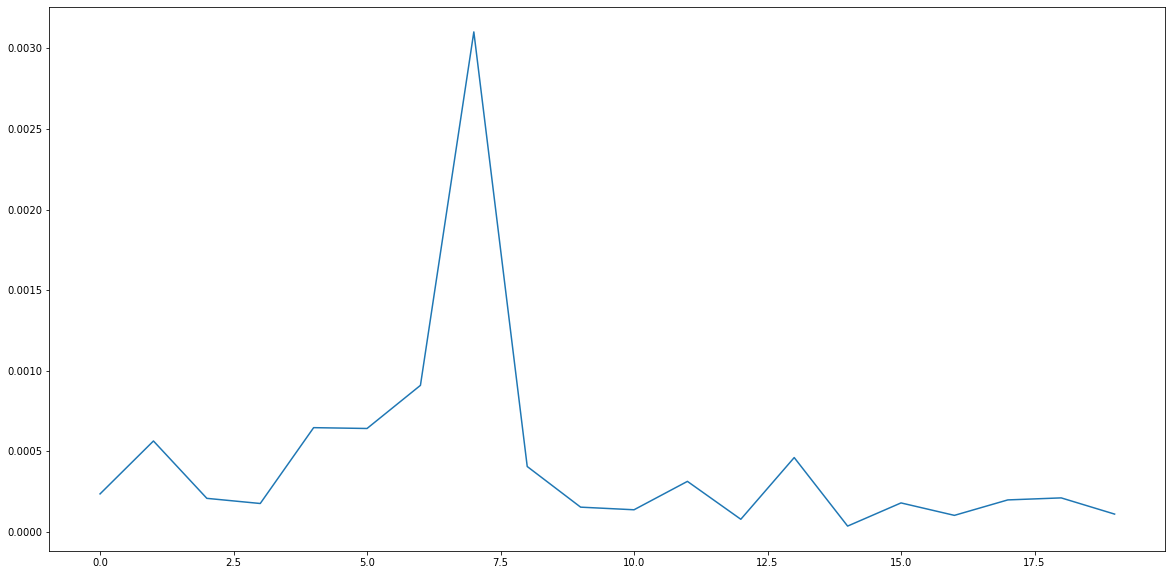

[0.00023513010005926153, 0.0005636184780725947, 0.00020757557896162605, 0.0001756033687375039, 0.0006463769545478476, 0.0006412100324198429, 0.0009089028439590118, 0.003102703903022605, 0.0004052191206344895, 0.00015290929874875144, 0.00013667934343559315, 0.00031292964523525985, 7.771422238147723e-05, 0.0004607154428991212, 3.537534577243543e-05, 0.00017918460034143307, 0.00010196373241741373, 0.00019786610934626275, 0.00021042776915944605, 0.00010980719470857438]


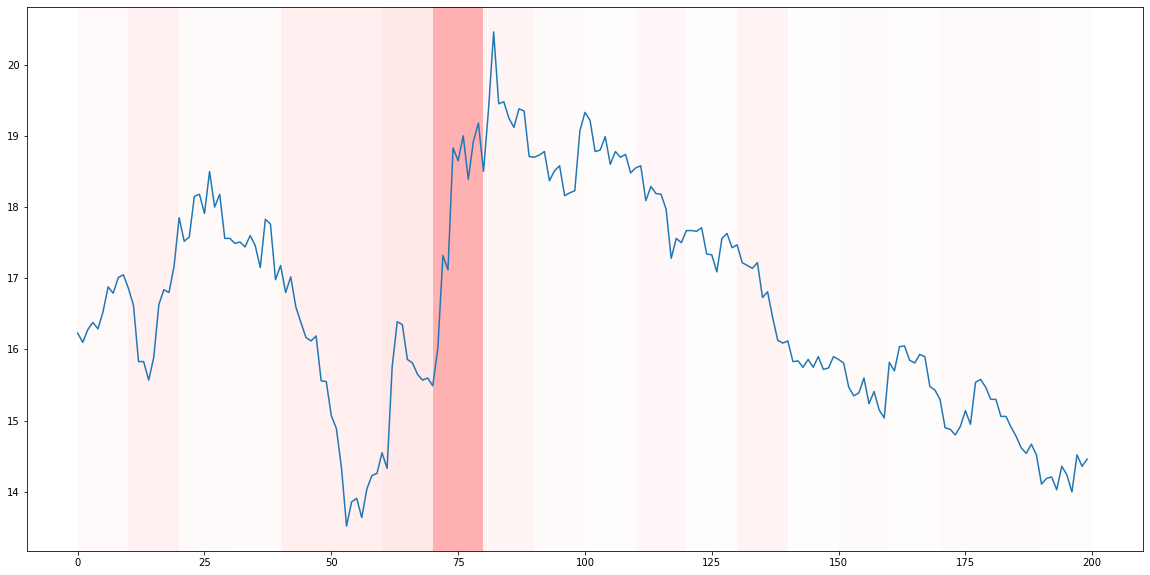

In [15]:
# 对data曲线进行DFT变换，得到频域上的信号
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd
import high_low_xuejie_zuhui as hl
filename = '000002.SZ.csv'
df = hl.df_init(filename)
data = df.tail(200)
# 将data等分为20份，对每份按照上述方法求的高频成分所占比例
n = 20
data_list = np.array_split(data, n)
high_freq_ratio_list = []
for temp_data in data_list:
    data_fft = fft(temp_data['S_DQ_CLOSE'].values)
    energy = (data_fft * np.conj(data_fft)).real
    high_freq_ratio = np.sum(energy[3:]) / np.sum(energy)
    high_freq_ratio_list.append(high_freq_ratio)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(high_freq_ratio_list)
plt.show()
print(high_freq_ratio_list)
# 使用plt.axvspan将高频成分占比可视化到data曲线上，高频占比越高的区域颜色越深
plt.figure(figsize=(20, 10))
plt.plot(data['S_DQ_CLOSE'].values)
for i in range(len(high_freq_ratio_list)):
    plt.axvspan(i * 10, (i + 1) * 10, facecolor='r',
                alpha=high_freq_ratio_list[i] * 100)